In [1]:
import sys
!{sys.executable} -m pip install pandas matplotlib colour numpy BigNumber

In [2]:
import requests
import json
import pandas as pd
import time
from datetime import datetime
from os import path
import requests
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; np.random.seed(0)
from datetime import date
import scipy.stats

In [3]:
from __future__ import print_function
import matplotlib.ticker as ticker
from colour import Color

In [4]:
color1 = '#%02x%02x%02x' % (25, 114, 120)
color2 = '#%02x%02x%02x' % (237, 221, 212)
color3 = '#%02x%02x%02x' % (196, 69, 54)

In [5]:
from setuptools import setup

In [6]:
from BigNumber import *
from timeit import default_timer as timer

In [7]:
from mpmath import *
mp.pretty = True

In [8]:
pd.options.display.max_columns = None

In [9]:
plt.close("all")
dir_logs = "./imports/"
tick_file = "strategy-tick.csv"
update_file = "state-update.csv"

In [10]:
def get_timestamp_payload(path):
    raw_data = pd.read_csv(path)
    data = raw_data[["jsonPayload.message", "timestamp"]]
    data.columns = ["payload", "timestamp"]
    data = data.assign(payload_timestamp = data["payload"].str.extract(r'(.+?(?=\shopr:cover-traffic\s))'))
    data["payload"] = data["payload"].str.extract(r'hopr:cover-traffic\s(.*)')
    return data

In [11]:
def parse_strategy_tick(data):
    data = data.assign(tick_timestamp = data["payload"].str.extract(r'strategy tick:\s?(\d*)\s', expand=False))
    data = data.assign(balance = data["payload"].str.extract(r'balance:\s?(\d*)\s'))
    data = data.assign(rounded_balance = data["balance"].astype(float).div(1e18))
    data = data.assign(open_to_node = data["payload"].str.extract(r'open:\s?([\w\,]*)\s'))
    data = data.assign(close_to_node = data["payload"].str.extract(r'close:\s?([\w\,]*)\s?'))
    data["tick_timestamp"] =  pd.to_datetime(data["tick_timestamp"].apply(pd.to_numeric), unit="ms")
    return data[["timestamp", "payload_timestamp", "tick_timestamp", "balance", "rounded_balance", "open_to_node", "close_to_node"]]

In [12]:
tick_logs = parse_strategy_tick(get_timestamp_payload(dir_logs + tick_file))

In [13]:
tick_logs

,timestamp,payload_timestamp,tick_timestamp,balance,rounded_balance,open_to_node,close_to_node
0,2021-10-09T10:20:43.456583458Z,2021-10-09T10:20:43.440Z,2021-10-09 10:20:43.440,100999999999999994000,101.0,,
1,2021-10-09T10:20:33.272554402Z,2021-10-09T10:20:33.255Z,2021-10-09 10:20:33.255,100999999999999994000,101.0,,
2,2021-10-09T10:20:23.181758667Z,2021-10-09T10:20:23.169Z,2021-10-09 10:20:23.169,100999999999999994000,101.0,,
3,2021-10-09T10:20:13.078857921Z,2021-10-09T10:20:13.074Z,2021-10-09 10:20:13.074,100999999999999994000,101.0,,
4,2021-10-09T10:19:41.807554045Z,2021-10-09T10:19:41.791Z,2021-10-09 10:19:41.791,100999999999999994000,101.0,,
...,...,...,...,...,...,...,...
8101,2021-10-08T11:16:05.401685712Z,2021-10-08T11:16:05.400Z,2021-10-08 11:16:05.400,100999999999999993000,101.0,,
8102,2021-10-07T16:11:18.420668286Z,2021-10-07T16:11:18.404Z,2021-10-07 16:11:18.404,100999999999999993000,101.0,,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...
8103,2021-10-07T16:10:24.141280277Z,2021-10-07T16:10:24.128Z,2021-10-07 16:10:24.128,100999999999999993000,101.0,,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...
8104,2021-10-07T16:09:30.870781784Z,2021-10-07T16:09:30.857Z,2021-10-07 16:09:30.857,100999999999999993000,101.0,,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...


In [14]:
#reseting the "tick_timestamp" to ascending

In [15]:
tick_logs = tick_logs.sort_values(by='tick_timestamp', ascending=True, ignore_index = True)

<Figure size 432x288 with 0 Axes>

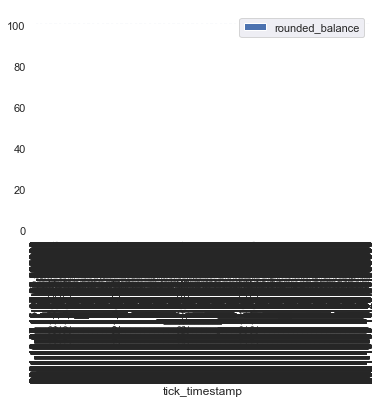

In [131]:
plt.figure()
tick_logs.plot(x="tick_timestamp", y="rounded_balance", kind="bar")

In [16]:
#values of the relevat attributes

In [17]:
tick_logs['balance'].value_counts()

100999999999999994000    8101
100999999999999993000       4
100999999999999992000       1
Name: balance, dtype: int64

In [18]:
tick_logs['open_to_node'].value_counts()

    8106
Name: open_to_node, dtype: int64

In [19]:
tick_logs['close_to_node'].value_counts()

                                                         8103
16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpViiepurP       3
Name: close_to_node, dtype: int64

In [20]:
tick_logs.dtypes

timestamp                    object
payload_timestamp            object
tick_timestamp       datetime64[ns]
balance                      object
rounded_balance             float64
open_to_node                 object
close_to_node                object
dtype: object

In [21]:
df = tick_logs

In [23]:
df['balance_1'] = df['balance']

In [24]:
# the balance conversion from onbject to int does'n work with row wise conversion or with astype! (It gives the following error: "Python int too large to convert to C long")
# converting to float rounds the value (causing data loss)

In [25]:
df['balance_1']  = df['balance_1'].apply(lambda x: int(x))

In [26]:
import sys

In [27]:
sys.maxsize

9223372036854775807

In [28]:
#calculating the balance change between each logs "bal_diff"

In [29]:
df["bal_diff"] = df['balance_1'].diff()

In [33]:
df

,timestamp,payload_timestamp,tick_timestamp,balance,rounded_balance,open_to_node,close_to_node,balance_1,bal_diff
0,2021-10-07T16:08:34.993477294Z,2021-10-07T16:08:34.954Z,2021-10-07 16:08:34.954,100999999999999992000,101.0,,,100999999999999992000,NaN
1,2021-10-07T16:09:30.870781784Z,2021-10-07T16:09:30.857Z,2021-10-07 16:09:30.857,100999999999999993000,101.0,,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,1000
2,2021-10-07T16:10:24.141280277Z,2021-10-07T16:10:24.128Z,2021-10-07 16:10:24.128,100999999999999993000,101.0,,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0
3,2021-10-07T16:11:18.420668286Z,2021-10-07T16:11:18.404Z,2021-10-07 16:11:18.404,100999999999999993000,101.0,,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0
4,2021-10-08T11:16:05.401685712Z,2021-10-08T11:16:05.400Z,2021-10-08 11:16:05.400,100999999999999993000,101.0,,,100999999999999993000,0
...,...,...,...,...,...,...,...,...,...
8101,2021-10-09T10:19:41.807554045Z,2021-10-09T10:19:41.791Z,2021-10-09 10:19:41.791,100999999999999994000,101.0,,,100999999999999994000,0
8102,2021-10-09T10:20:13.078857921Z,2021-10-09T10:20:13.074Z,2021-10-09 10:20:13.074,100999999999999994000,101.0,,,100999999999999994000,0
8103,2021-10-09T10:20:23.181758667Z,2021-10-09T10:20:23.169Z,2021-10-09 10:20:23.169,100999999999999994000,101.0,,,100999999999999994000,0
8104,2021-10-09T10:20:33.272554402Z,2021-10-09T10:20:33.255Z,2021-10-09 10:20:33.255,100999999999999994000,101.0,,,100999999999999994000,0


In [34]:
df.describe()

,rounded_balance
count,8106.0
mean,101.0
std,0.0
min,101.0
25%,101.0
50%,101.0
75%,101.0
max,101.0


In [35]:
df['bal_diff'].value_counts()

0       8103
1000       2
Name: bal_diff, dtype: int64

In [36]:
#filling up the missing values first with NaN and with 0s 

In [37]:
df = df.replace(r'^\s*$', np.nan, regex=True)

In [38]:
#by default the first value of "bal_diff" is always a missing value - filling up with 0 can creat error! (if there is an actual change in the balance value)  

In [39]:
df['bal_diff'] = df['bal_diff'].fillna(0)

In [40]:
df['open_to_node'] = df['open_to_node'].fillna(0)

In [41]:
df['close_to_node'] = df['close_to_node'].fillna(0)

In [42]:
#"activity" shows if the given log shows any node activity (balance change, chanell open or close)

In [43]:
df['activity'] = (df['bal_diff'] == 0) & (df['open_to_node'] == 0) & (df['close_to_node'] == 0)

In [130]:
df.head(40)

,timestamp,payload_timestamp,tick_timestamp,balance,rounded_balance,open_to_node,close_to_node,balance_1,bal_diff,activity
0,2021-10-07T16:08:34.993477294Z,2021-10-07T16:08:34.954Z,2021-10-07 16:08:34.954,100999999999999992000,101.0,0.0,0,100999999999999992000,0.0,True
1,2021-10-07T16:09:30.870781784Z,2021-10-07T16:09:30.857Z,2021-10-07 16:09:30.857,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,1000.0,False
2,2021-10-07T16:10:24.141280277Z,2021-10-07T16:10:24.128Z,2021-10-07 16:10:24.128,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0.0,False
3,2021-10-07T16:11:18.420668286Z,2021-10-07T16:11:18.404Z,2021-10-07 16:11:18.404,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0.0,False
4,2021-10-08T11:16:05.401685712Z,2021-10-08T11:16:05.400Z,2021-10-08 11:16:05.400,100999999999999993000,101.0,0.0,0,100999999999999993000,0.0,True
5,2021-10-08T11:16:55.959680021Z,2021-10-08T11:16:55.941Z,2021-10-08 11:16:55.941,100999999999999994000,101.0,0.0,0,100999999999999994000,1000.0,False
6,2021-10-08T11:17:06.041522758Z,2021-10-08T11:17:06.022Z,2021-10-08 11:17:06.022,100999999999999994000,101.0,0.0,0,100999999999999994000,0.0,True
7,2021-10-08T11:17:16.101186626Z,2021-10-08T11:17:16.090Z,2021-10-08 11:17:16.090,100999999999999994000,101.0,0.0,0,100999999999999994000,0.0,True
8,2021-10-08T11:17:26.681058943Z,2021-10-08T11:17:26.657Z,2021-10-08 11:17:26.657,100999999999999994000,101.0,0.0,0,100999999999999994000,0.0,True
9,2021-10-08T11:17:36.745732921Z,2021-10-08T11:17:36.732Z,2021-10-08 11:17:36.732,100999999999999994000,101.0,0.0,0,100999999999999994000,0.0,True


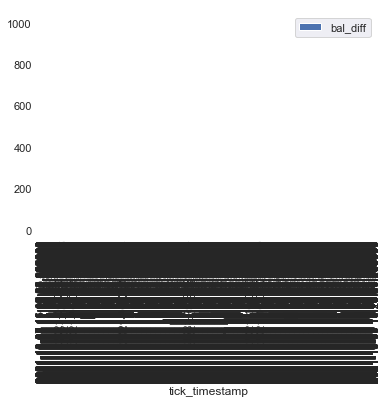

In [127]:
df.plot(x="tick_timestamp", y="bal_diff", kind="bar", color= "b")

In [46]:
#creating subfiles from the logs, which contain some activity 

In [47]:
act = df[df['activity'] == True].index
act

Int64Index([   0,    4,    6,    7,    8,    9,   10,   11,   12,   13,
            ...
            8096, 8097, 8098, 8099, 8100, 8101, 8102, 8103, 8104, 8105],
           dtype='int64', length=8102)

In [129]:
df_act = (df.drop(act)).reset_index(drop=True)
df_act

,timestamp,payload_timestamp,tick_timestamp,balance,rounded_balance,open_to_node,close_to_node,balance_1,bal_diff,activity
0,2021-10-07T16:09:30.870781784Z,2021-10-07T16:09:30.857Z,2021-10-07 16:09:30.857,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,1000.0,False
1,2021-10-07T16:10:24.141280277Z,2021-10-07T16:10:24.128Z,2021-10-07 16:10:24.128,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0.0,False
2,2021-10-07T16:11:18.420668286Z,2021-10-07T16:11:18.404Z,2021-10-07 16:11:18.404,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0.0,False
3,2021-10-08T11:16:55.959680021Z,2021-10-08T11:16:55.941Z,2021-10-08 11:16:55.941,100999999999999994000,101.0,0.0,0,100999999999999994000,1000.0,False


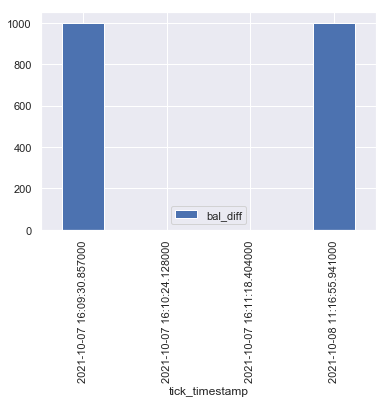

In [49]:
df_act.plot(x="tick_timestamp", y="bal_diff", kind="bar", color= "b")

In [124]:
a=df_act["tick_timestamp"]
b=df_act["rounded_balance"]
c=df_act["bal_diff"]

In [50]:
df_act.plot(x="tick_timestamp", y="balance_1", kind="bar", color= "b")

TypeError: no numeric data to plot

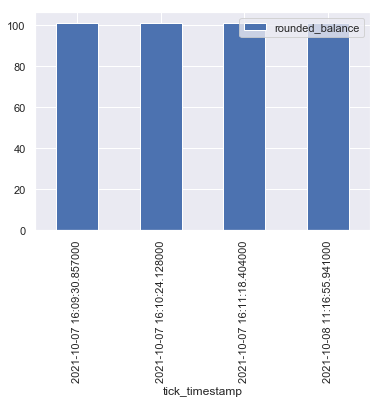

In [51]:
df_act.plot(x="tick_timestamp", y="rounded_balance", kind="bar", color= "b")

In [108]:
import matplotlib.dates as md
import dateutil

In [52]:
#for the given database a solution for "balance" problem is slicing digit wise "_balance" and "balance_"

In [78]:
df_act['_balance'] = df_act.balance.apply(lambda x: x[:3])

In [92]:
df_act['balance_'] = df_act.balance.apply(lambda x: x[-18::])

In [93]:
df_act

,timestamp,payload_timestamp,tick_timestamp,balance,rounded_balance,open_to_node,close_to_node,balance_1,bal_diff,activity,_balance,balance_,balance_sl,div,digits
0,2021-10-07T16:09:30.870781784Z,2021-10-07T16:09:30.857Z,2021-10-07 16:09:30.857,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,1000.0,False,100,999999999999993000,1.000000e+18,2,21
1,2021-10-07T16:10:24.141280277Z,2021-10-07T16:10:24.128Z,2021-10-07 16:10:24.128,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0.0,False,100,999999999999993000,1.000000e+18,2,21
2,2021-10-07T16:11:18.420668286Z,2021-10-07T16:11:18.404Z,2021-10-07 16:11:18.404,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0.0,False,100,999999999999993000,1.000000e+18,2,21
3,2021-10-08T11:16:55.959680021Z,2021-10-08T11:16:55.941Z,2021-10-08 11:16:55.941,100999999999999994000,101.0,0.0,0,100999999999999994000,1000.0,False,100,999999999999994000,1.000000e+18,2,21


In [89]:
#balance_sl a float version of balance_

In [85]:
df_act['balance_sl'] = (df_act['balance_'].astype(float))

In [86]:
df_act['balance_sl'].value_counts()

1.000000e+18    3
1.000000e+18    1
Name: balance_sl, dtype: int64

import math

df_act['digits'] = df_act['balance_1'].astype(str).str.len()

df_act['div'] = df_act['digits'].apply(lambda x: math.ceil(x/18))

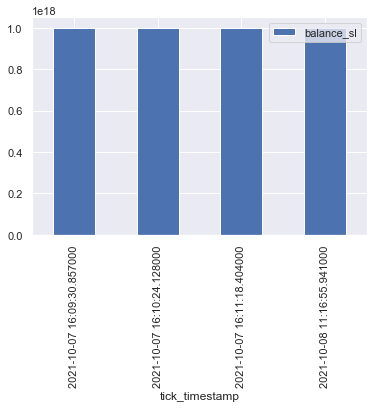

In [87]:
df_act.plot(x="tick_timestamp", y="balance_sl", kind="bar", color= "b")

In [120]:
df_act

,timestamp,payload_timestamp,tick_timestamp,balance,rounded_balance,open_to_node,close_to_node,balance_1,bal_diff,activity,_balance,balance_,balance_sl,div,digits
0,2021-10-07T16:09:30.870781784Z,2021-10-07T16:09:30.857Z,2021-10-07 16:09:30.857,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,1000.0,False,100,999999999999993000,1.000000e+18,2,21
1,2021-10-07T16:10:24.141280277Z,2021-10-07T16:10:24.128Z,2021-10-07 16:10:24.128,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0.0,False,100,999999999999993000,1.000000e+18,2,21
2,2021-10-07T16:11:18.420668286Z,2021-10-07T16:11:18.404Z,2021-10-07 16:11:18.404,100999999999999993000,101.0,0.0,16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...,100999999999999993000,0.0,False,100,999999999999993000,1.000000e+18,2,21
3,2021-10-08T11:16:55.959680021Z,2021-10-08T11:16:55.941Z,2021-10-08 11:16:55.941,100999999999999994000,101.0,0.0,0,100999999999999994000,1000.0,False,100,999999999999994000,1.000000e+18,2,21


In [115]:
c= df_act['balance_sl']

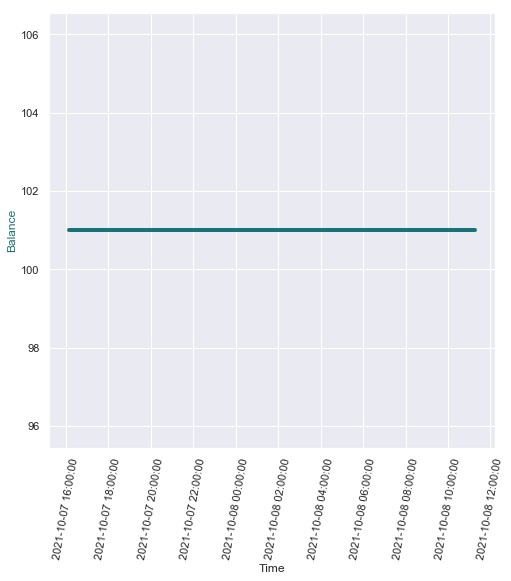

In [122]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.plot(a, b, color=color1, lw=4)

ax.set_xlabel("Time")
ax.set_ylabel("Balance", color=color1)

#ax=plt.gca()
#ax.set_xticks(a)
plt.xticks(rotation= 80)

xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.show()

In [123]:
#openings and closings

In [94]:
df_close = (df.groupby(['close_to_node']).agg({'close_to_node': ['count'], 'tick_timestamp': ['first'], 'tick_timestamp': ['last'],} )).reset_index(drop=False)

In [95]:
df_close

close_to_node        \
                                                     count   
0                                                  0  8103   
1  16Uiu2HAmHnyJaC8whSRBXXk3ikPuH19g52ZgxvA3sUnpV...     3   

           tick_timestamp  
                     last  
0 2021-10-09 10:20:43.440  
1 2021-10-07 16:11:18.404